In [3]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/hr_dataset (1).csv")

In [5]:
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df['churn'].value_counts()

0    11428
1     3571
Name: churn, dtype: int64

In [8]:
df.isna().sum()

satisfaction            0
evaluation              0
number_of_projects      0
average_montly_hours    0
time_spend_company      0
work_accident           0
churn                   0
promotion               0
department              0
salary                  0
dtype: int64

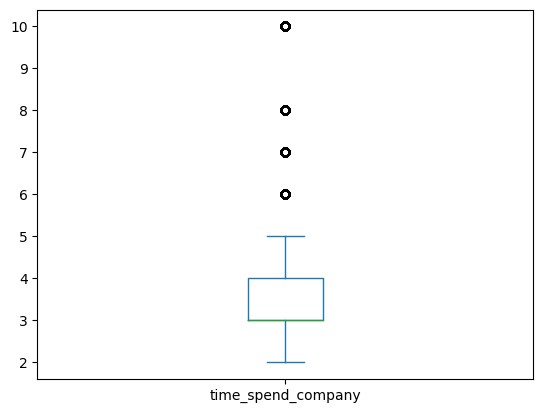

In [9]:
df['time_spend_company'].plot(kind="box")
plt.show()

In [10]:
import scipy.stats as stats

In [11]:
df['zr'] = stats.zscore(df['time_spend_company'])

In [12]:
df[(df['zr'] < -3) | (df['zr']> 3)].index  

Int64Index([11007, 11008, 11009, 11010, 11011, 11078, 11079, 11080, 11081,
            11082,
            ...
            14187, 14192, 14193, 14194, 14204, 14205, 14206, 14207, 14208,
            14209],
           dtype='int64', length=376)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
 10  zr                    14999 non-null  float64
dtypes: float64(3), int64(6), object(2)
memory usage: 1.3+ MB


In [14]:
df.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary', 'zr'],
      dtype='object')

In [15]:
x=df.drop('churn',axis=1)

In [16]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department,salary,zr
0,0.38,0.53,2,157,3,0,0,sales,low,-0.341235
1,0.80,0.86,5,262,6,0,0,sales,medium,1.713436
2,0.11,0.88,7,272,4,0,0,sales,medium,0.343655
3,0.72,0.87,5,223,5,0,0,sales,low,1.028546
4,0.37,0.52,2,159,3,0,0,sales,low,-0.341235
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,-0.341235
14995,0.37,0.48,2,160,3,0,0,support,low,-0.341235
14996,0.37,0.53,2,143,3,0,0,support,low,-0.341235
14997,0.11,0.96,6,280,4,0,0,support,low,0.343655


In [17]:
y=df['churn']

In [18]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
x=pd.get_dummies(x)

In [20]:
x

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,zr,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,-0.341235,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1.713436,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0.343655,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1.028546,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,-0.341235,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,-0.341235,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,-0.341235,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,-0.341235,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0.343655,0,0,...,0,0,0,0,0,1,0,0,1,0


In [21]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 134)

In [24]:
mn = MinMaxScaler()
x_train = mn.fit_transform(x_train)
x_test = mn.fit_transform(x_test)

In [25]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [26]:
lg.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = lg.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
acc = accuracy_score(y_test, y_pred)
print(acc)

0.7906666666666666


In [30]:
confusion_matrix(y_test, y_pred)

array([[2128,  159],
       [ 469,  244]])

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [32]:
precision_score(y_test, y_pred)

0.6054590570719603

In [33]:
recall_score(y_test, y_pred)

0.34221598877980364

In [34]:
f1_score(y_test, y_pred)

0.4372759856630824

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)

In [37]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [38]:
y_pred = knn.predict(x_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[2184,  103],
       [ 107,  606]])

In [40]:
accuracy_score(y_test, y_pred)

0.93

In [41]:
for k in range(3,16,2):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  print(acc,k)

0.951 3
0.9373333333333334 5
0.9383333333333334 7
0.938 9
0.93 11
0.9276666666666666 13
0.925 15


In [42]:
precision_score(y_test, y_pred)

0.8398328690807799

In [43]:
recall_score(y_test, y_pred)

0.8457223001402524

In [44]:
f1_score(y_test, y_pred)

0.8427672955974843

In [45]:
from sklearn.svm import SVC

In [46]:
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(x_train, y_train)
 
y_pred = svc_model .predict(x_test)

In [47]:
acc = accuracy_score(y_test, y_pred)
print(acc,k)

0.7746666666666666 15


In [48]:
precision_score(y_test, y_pred)

0.5587301587301587